# Global Terrorism Database Analysis

## Introduction
The aim of this analysis is to provide answers to the following questions:

- How has the number of terrorist activities changed over the years?
- Are there certain regions where this trend is different from the global averages?
- How often the attack becomes a success?
- What are the most common methods of attacks? Does it differ in various regions or in time?

## Problem Statement
- Many terrorist attacks remain unattributed due to the absence of claims, delaying
effective counter measures.
- This project uses the Global Terrorism Database to build machine learning models
that predict the likely perpetrator group based on attack characteristics.
- By addressing challenges such as class imbalance and noisy data, the goal is to
support faster investigations, better resource allocation, and more effective
preventive strategies.

## About the dataset
The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

## Explanation of selected columns:
- success - Success of a terrorist strike
- suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
- attacktype1 - The general method of attack
- attacktype1_txt - The general method of attack and broad class of tactics used.
- targtype1_txt - The general type of target/victim
- targsubtype1_txt - The more specific target category
- target1 - The specific person, building, installation that was targeted and/or victimized
- natlty1_txt - The nationality of the target that was attacked
- gname - The name of the group that carried out the attack
- gsubname - Additional details about group that carried out the attack like fractions
- nperps - The total number of terrorists participating in the incident
- weaptype1_txt - General type of weapon used in the incident
- weapsubtype1_txt - More specific value for most of the Weapon Types
- nkill - The number of total confirmed fatalities for the incident
- nkillus - The number of U.S. citizens who died as a result of the incidentkdjsa

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Machine learning models using scikit-learn library
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Import required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [3]:
# import dataset
data1 = pd.read_csv('../gtd_data/globalterrorismdb_1.csv')
data2 = pd.read_csv('../gtd_data/globalterrorismdb_2021Jan-June_1222dist.csv')

In [4]:
# combining data from (1970-2017) + (2017 - 2021)
data = pd.concat([data1, data2], ignore_index=True)

In [8]:
# Data Shape
records = data.shape[0]
features = data.shape[1]

print('Total Number of recorded incidents: ', records)
print('Number of Features: ', features)

Total Number of recorded incidents:  214666
Number of Features:  135


In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
# Features describing the incidents
print(data.columns.values)

['eventid' 'iyear' 'imonth' 'iday' 'approxdate' 'extended' 'resolution'
 'country' 'country_txt' 'region' 'region_txt' 'provstate' 'city'
 'latitude' 'longitude' 'specificity' 'vicinity' 'location' 'summary'
 'crit1' 'crit2' 'crit3' 'doubtterr' 'alternative' 'alternative_txt'
 'multiple' 'success' 'suicide' 'attacktype1' 'attacktype1_txt'
 'attacktype2' 'attacktype2_txt' 'attacktype3' 'attacktype3_txt'
 'targtype1' 'targtype1_txt' 'targsubtype1' 'targsubtype1_txt' 'corp1'
 'target1' 'natlty1' 'natlty1_txt' 'targtype2' 'targtype2_txt'
 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2' 'natlty2'
 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'gname'
 'gsubname' 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'motive'
 'guncertain1' 'guncertain2' 'guncertain3' 'individual' 'nperps'
 'nperpcap' 'claimed' 'claimmode' 'claimmode_txt' 'claim2' 'claimmode2'
 'claimmode2_txt' 'claim3' 'claimmode3' 'claimmode3_txt' 'compclaim'


## Data Exploration

### 1. Number of Terrist Attacks per year

In [11]:
attacks_per_year = data['iyear'].value_counts().sort_index()

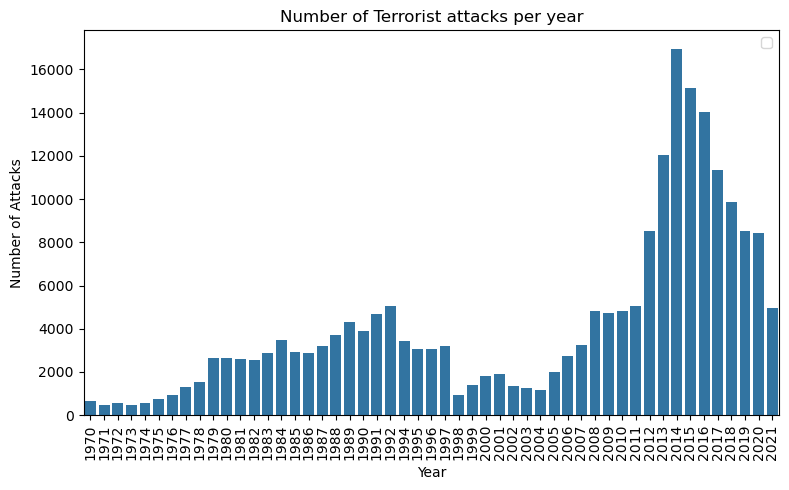

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data, x='iyear')
plt.title('Number of Terrorist attacks per year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

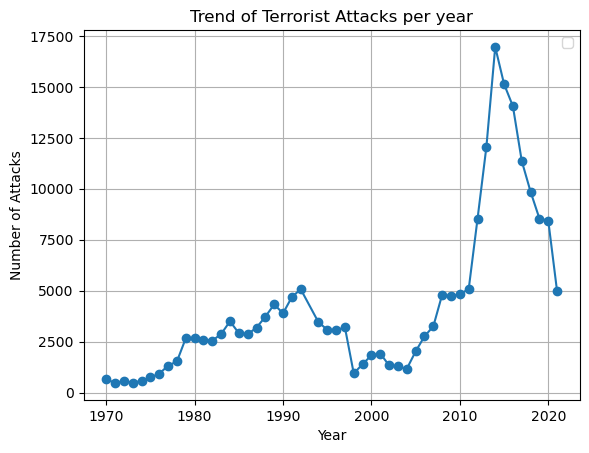

In [25]:
# 2. Time series of Attacks every year since 1970
plt.Figure(figsize=(10, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-')
plt.title('Trend of Terrorist Attacks per year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
# Inferece : We can clearly see that the number of Terrorist attacks have been increasing every year. 
# In 2014, maximum number of attacks were happened through out the world. 
# And after effective counter strategies they started reducing after 2014

### 3. Variety of Attack Types

In [27]:
attack_types = data['attacktype1_txt'].value_counts().sort_values(ascending=False)
attack_types.head()

attacktype1_txt
Bombing/Explosion                 99986
Armed Assault                     50845
Assassination                     21989
Hostage Taking (Kidnapping)       14493
Facility/Infrastructure Attack    12606
Name: count, dtype: int64

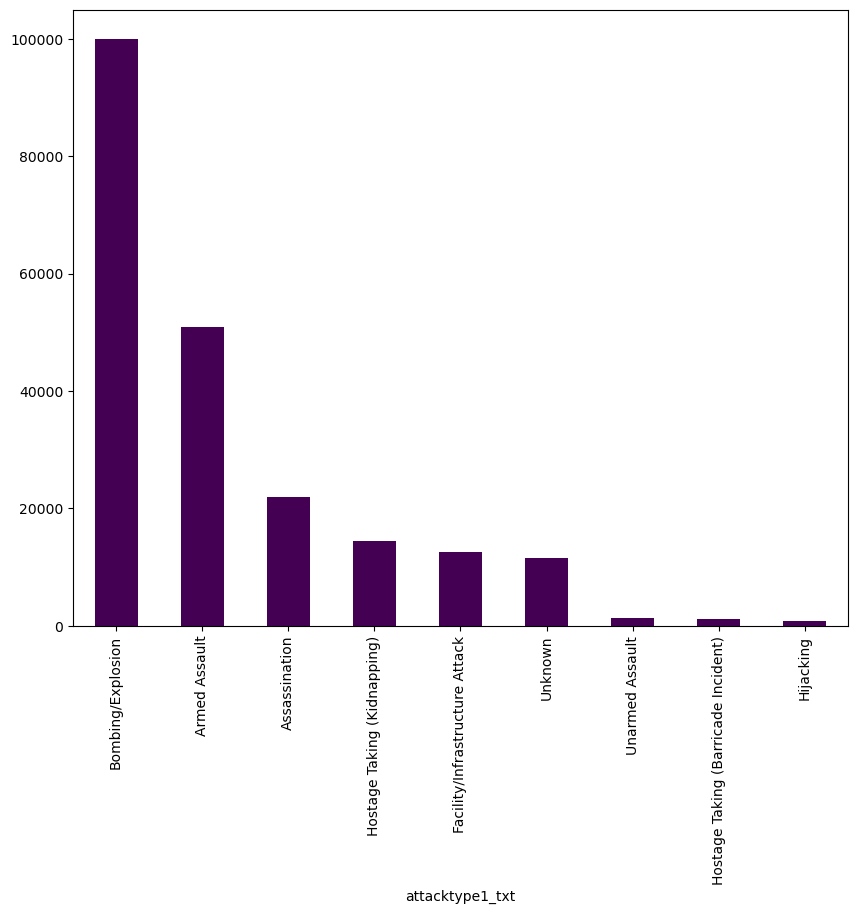

In [29]:
plt.figure(figsize=(10, 8))
attack_types.plot(kind='bar', colormap='viridis')
plt.show()